#### Detect edges of vehicles and road markings to assess traffic patterns.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def display_image(image):
    plt.imshow(image)
    plt.show()
    return

def display_image_gray(image):
    plt.imshow(image,cmap='gray')
    plt.show()
    return

In [3]:
def gaussian_blur(image):
    image = cv2.GaussianBlur(image,(11,11),0)
    return image



In [4]:
def apply_filter(image):
    
    filtered = cv2.bilateralFilter(image,9,75,75)
    
    return filtered

In [5]:

def sharpen(image):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    image = cv2.filter2D(image, -1, kernel)
    return image



In [6]:
def get_threshold(image):
    ret,thresh = cv2.threshold(image,117,220,0)
    return thresh



In [7]:
def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

def road_markings(image,eadge):
    
    line = cv2.HoughLinesP(eadge, 1, np.pi/180, 77, minLineLength=50, maxLineGap=10)
    line_image = drow_the_lines(image, line)
    return line_image


In [8]:
def edge_detection(image):
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(blur, 180, 200, apertureSize=3)

    return edges

In [9]:
def detect_edges_pipline(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blured = gaussian_blur(gray_image)
    filtered = apply_filter(blured)
    sharpened = sharpen(filtered)
    thresh = get_threshold(sharpened)
    edge_iamge = edge_detection(thresh)
    road_mark = road_markings(image,edge_iamge)
    final_image = cv2.cvtColor(road_mark, cv2.COLOR_BGR2RGB)
    display_image(final_image)




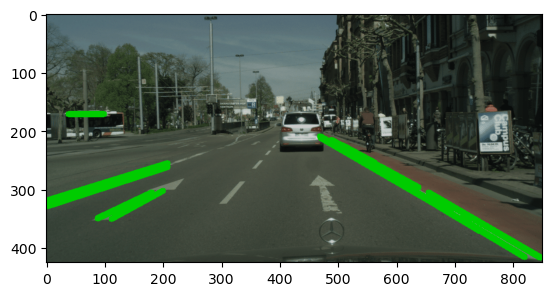

In [10]:
image_path  = "images/image_2.png"
detect_edges_pipline(image_path)